In [1]:
%pylab inline
import scipy.io as sio
from sklearn.neighbors import NearestNeighbors
from sklearn import svm, grid_search, tree
from sklearn.cross_validation import cross_val_predict, cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from IPython.display import IFrame
import csv
import pydot

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename = "preshortlong_roland_CSTcombo.csv"
data = np.genfromtxt(filename, delimiter=",")
mytext=[]
with open(filename, 'rU') as csvfile:
    readit = csv.reader(csvfile, delimiter=",", dialect=csv.excel_tab)
    for row in readit:
        mytext.append(row)
classnames = ['no_deficit', 'deficit']
featurenames = mytext[0]
data = data[1:,:]
print featurenames
print data.shape

['pre_motor_def', 'pre_sense_def', 'pre_lang_def', 'pre_vision_def', 'pre_slf2', 'pre_slf3', 'pre_arc', 'pre_slftp', 'pre_ilf', 'pre_mdlf', 'pre_ifof', 'pre_unc', 'pre_cst', 'xtra', 'xtra', 'pre_or', 'short_motor_def', 'short_sense_def', 'short_lang_def', 'short_vision_def', 'short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc', 'short_cst', 'xtra', 'xtra', 'short_or', 'long_motor_def', 'long_sense_def', 'long_lang_def', 'long_vision_def', 'long_slf2', 'long_slf3', 'long_arc', 'long_slftp', 'long_ilf', 'long_mdlf', 'long_ifof', 'long_unc', 'long_cst', 'xtra', 'xtra', 'long_or']
(33, 48)


In [3]:
def doforest(x,y,featurelabels, figname):
    from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
    from sklearn.cross_validation import cross_val_score
    import matplotlib.pyplot as plt
    clf = RandomForestClassifier(n_estimators=1000, )
    #clf2 = ExtraTreesClassifier(n_estimators=500)
    clf_fit = clf.fit(x,y)
    scores = cross_val_score(clf,x,y)
    meanscore = scores.mean()
    importances = clf_fit.feature_importances_
    print meanscore
    print importances
    print featurelabels
    std = np.std([tree.feature_importances_ for tree in clf_fit.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    for f in range(x.shape[1]):
        print("%d. feature %d = %s (%f)" % (f + 1, indices[f], featurelabels[indices[f]], importances[indices[f]]))
    #plt.figure()
    plt.title("Feature importances")
    plt.bar(range(x.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
    plt.xticks(range(x.shape[1]), indices)
    plt.xlim([-1, x.shape[1]])
    #plt.show()
    savefig(figname+'.png')
    return importances, meanscore

In [4]:
def dotree(x,y,featurenames,name):
    tree_clf = tree.DecisionTreeClassifier()
    tree_clf = tree_clf.fit(x,y)
    from sklearn.externals.six import StringIO
    with open("graph.dot",'w') as f:
        f=tree.export_graphviz(tree_clf, out_file=f)

    dot_data = StringIO()
    tree.export_graphviz(tree_clf, out_file=dot_data, feature_names=featurenames)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    graph.write_pdf(name+".pdf")

In [5]:
prex = data[:,4:16]
prefeat = featurenames[4:16]

prey = data[:,0:4]
preylabel = featurenames[0:4]

print prefeat
print preylabel

['pre_slf2', 'pre_slf3', 'pre_arc', 'pre_slftp', 'pre_ilf', 'pre_mdlf', 'pre_ifof', 'pre_unc', 'pre_cst', 'xtra', 'xtra', 'pre_or']
['pre_motor_def', 'pre_sense_def', 'pre_lang_def', 'pre_vision_def']


In [6]:
shortx = data[:,20:32]
shortfeat = featurenames[20:32]

shorty = data[:,16:20]
shortylabel = featurenames[16:20]

print shortfeat
print shortylabel

['short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc', 'short_cst', 'xtra', 'xtra', 'short_or']
['short_motor_def', 'short_sense_def', 'short_lang_def', 'short_vision_def']


In [7]:
longx = data[:,36:]
longfeat = featurenames[36:]

longy = data[:,32:36]
longylabel = featurenames[32:36]

print longfeat
print longylabel

['long_slf2', 'long_slf3', 'long_arc', 'long_slftp', 'long_ilf', 'long_mdlf', 'long_ifof', 'long_unc', 'long_cst', 'xtra', 'xtra', 'long_or']
['long_motor_def', 'long_sense_def', 'long_lang_def', 'long_vision_def']


In [28]:
name = "preMOTOR"
deficit = 0
print preylabel[deficit]
dotree(prex, prey[:,deficit],prefeat, name)
print sum(prey[:,deficit])
#IFrame(name+'.pdf',width=700,height=500)

pre_motor_def
5.0


In [29]:
#importances, meanaccuracy = doforest(prex, prey[:,0], prefeat, "preMOTOR_forest")

In [9]:
name = "preSENSE"
deficit = 1
print preylabel[deficit]
dotree(prex, prey[:,deficit],prefeat, name)
print sum(prey[:,deficit])
#IFrame(name+'.pdf',width=200,height=150)

pre_sense_def
0.0


In [10]:
name = "preLANG"
deficit = 2
print preylabel[deficit]
dotree(prex, prey[:,deficit],prefeat, name)
print sum(prey[:,deficit])
IFrame(name+'.pdf',width=700,height=500)

pre_lang_def
3.0


0.909090909091
[ 0.06967847  0.06515961  0.14257679  0.25400932  0.03969464  0.14941373
  0.1810261   0.04944133]
['pre_slf2', 'pre_slf3', 'pre_arc', 'pre_slftp', 'pre_ilf', 'pre_mdlf', 'pre_ifof', 'pre_unc']
1. feature 3 = pre_slftp (0.254009)
2. feature 6 = pre_ifof (0.181026)
3. feature 5 = pre_mdlf (0.149414)
4. feature 2 = pre_arc (0.142577)
5. feature 0 = pre_slf2 (0.069678)
6. feature 1 = pre_slf3 (0.065160)
7. feature 7 = pre_unc (0.049441)
8. feature 4 = pre_ilf (0.039695)


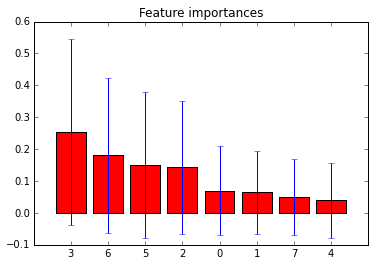

In [11]:
importances, meanaccuracy = doforest(prex[:,:-4], prey[:,2], prefeat[:-4], "preLANGUAGE_forest")

In [12]:
name = "preOPTIC"
deficit = 3
print preylabel[deficit]
dotree(prex, prey[:,deficit],prefeat, name)
print sum(prey[:,deficit])
#IFrame(name+'.pdf',width=700,height=500)

pre_vision_def
2.0


In [13]:
name = "shortMOTOR"
deficit = 0
print shortylabel[deficit]
dotree(shortx, shorty[:,deficit],shortfeat, name)
print sum(shorty[:,deficit])
IFrame(name+'.pdf',width=700,height=500)

short_motor_def
14.0


0.844949494949
[ 0.10456324  0.06815504  0.08506877  0.04653395  0.02654495  0.05706405
  0.18505251  0.05794281  0.3561462   0.          0.          0.01292848]
['short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc', 'short_cst', 'xtra', 'xtra', 'short_or']
1. feature 8 = short_cst (0.356146)
2. feature 6 = short_ifof (0.185053)
3. feature 0 = short_slf2 (0.104563)
4. feature 2 = short_arc (0.085069)
5. feature 1 = short_slf3 (0.068155)
6. feature 7 = short_unc (0.057943)
7. feature 5 = short_mdlf (0.057064)
8. feature 3 = short_slftp (0.046534)
9. feature 4 = short_ilf (0.026545)
10. feature 11 = short_or (0.012928)
11. feature 10 = xtra (0.000000)
12. feature 9 = xtra (0.000000)


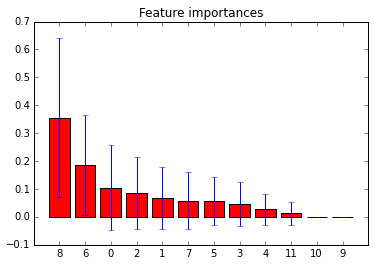

In [14]:
importances, meanaccuracy = doforest(shortx, shorty[:,0], shortfeat, "shortMOTOR_forest")

In [15]:
name = "shortSENSE"
deficit = 1
print shortylabel[deficit]
dotree(shortx, shorty[:,deficit],shortfeat, name)
print sum(shorty[:,deficit])
#IFrame(name+'.pdf',width=700,height=500)

short_sense_def
1.0


In [16]:
name = "shortLANGUAGE"
deficit = 2
print shortylabel[deficit]
dotree(shortx, shorty[:,deficit],shortfeat, name)
print sum(shorty[:,deficit])
IFrame(name+'.pdf',width=700,height=500)

short_lang_def
13.0


0.545454545455
[ 0.1496197   0.12350823  0.12377144  0.13051343  0.10041062  0.08510246
  0.16232229  0.12475183]
['short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc']
1. feature 6 = short_ifof (0.162322)
2. feature 0 = short_slf2 (0.149620)
3. feature 3 = short_slftp (0.130513)
4. feature 7 = short_unc (0.124752)
5. feature 2 = short_arc (0.123771)
6. feature 1 = short_slf3 (0.123508)
7. feature 4 = short_ilf (0.100411)
8. feature 5 = short_mdlf (0.085102)


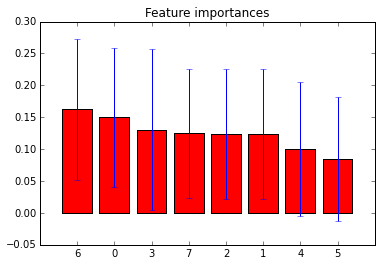

In [17]:
importances, meanaccuracy = doforest(shortx[:,:-4], shorty[:,2], shortfeat[:-4], "shortLANGUAGE_forest")

In [18]:
name = "shortOPTIC"
deficit = 3
print shortylabel[deficit]
dotree(shortx, shorty[:,deficit],shortfeat, name)
print sum(shorty[:,deficit])
IFrame(name+'.pdf',width=700,height=500)

short_vision_def
4.0


0.880808080808
[ 0.04007987  0.04111787  0.09384192  0.12983414  0.07824919  0.06193195
  0.08253828  0.08289717  0.04183006  0.          0.          0.33067955]
['short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc', 'short_cst', 'xtra', 'xtra', 'short_or']
1. feature 11 = short_or (0.330680)
2. feature 3 = short_slftp (0.129834)
3. feature 2 = short_arc (0.093842)
4. feature 7 = short_unc (0.082897)
5. feature 6 = short_ifof (0.082538)
6. feature 4 = short_ilf (0.078249)
7. feature 5 = short_mdlf (0.061932)
8. feature 8 = short_cst (0.041830)
9. feature 1 = short_slf3 (0.041118)
10. feature 0 = short_slf2 (0.040080)
11. feature 10 = xtra (0.000000)
12. feature 9 = xtra (0.000000)


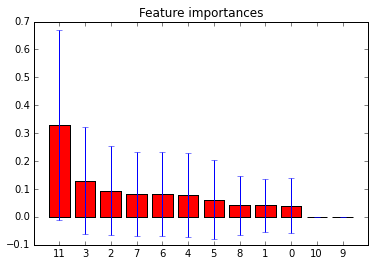

In [19]:
importances, meanaccuracy = doforest(shortx, shorty[:,3], shortfeat, "shortOPTIC_forest")

In [20]:
name = "longMOTOR"
deficit = 0
print longylabel[deficit]
dotree(longx, longy[:,deficit],longfeat, name)
print sum(longy[:,deficit])
IFrame(name+'.pdf',width=700,height=500)

long_motor_def
7.0


0.756060606061
[ 0.1824864   0.10124996  0.14889876  0.06971986  0.03119058  0.04112061
  0.15802482  0.04732524  0.21333799  0.          0.          0.00664577]
['long_slf2', 'long_slf3', 'long_arc', 'long_slftp', 'long_ilf', 'long_mdlf', 'long_ifof', 'long_unc', 'long_cst', 'xtra', 'xtra', 'long_or']
1. feature 8 = long_cst (0.213338)
2. feature 0 = long_slf2 (0.182486)
3. feature 6 = long_ifof (0.158025)
4. feature 2 = long_arc (0.148899)
5. feature 1 = long_slf3 (0.101250)
6. feature 3 = long_slftp (0.069720)
7. feature 7 = long_unc (0.047325)
8. feature 5 = long_mdlf (0.041121)
9. feature 4 = long_ilf (0.031191)
10. feature 11 = long_or (0.006646)
11. feature 10 = xtra (0.000000)
12. feature 9 = xtra (0.000000)


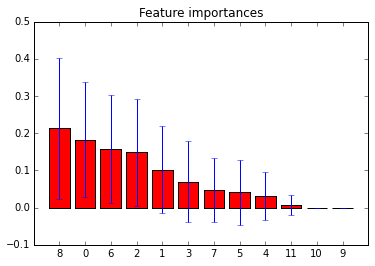

In [21]:
importances, meanaccuracy = doforest(longx, longy[:,0], longfeat, "longMOTOR_forest")

In [22]:
name = "longSENSE"
deficit = 1
print longylabel[deficit]
dotree(longx, longy[:,deficit],longfeat, name)
print sum(longy[:,deficit])
#IFrame(name+'.pdf',width=700,height=500)

long_sense_def
1.0


In [23]:
name = "longLANGUAGE"
deficit = 2
print longylabel[deficit]
dotree(longx, longy[:,deficit],longfeat, name)
print sum(longy[:,deficit])
IFrame(name+'.pdf',width=700,height=500)

long_lang_def
7.0


0.756060606061
[ 0.13707907  0.10071902  0.15177426  0.234601    0.05319441  0.10990415
  0.14134643  0.07038165]
['long_slf2', 'long_slf3', 'long_arc', 'long_slftp', 'long_ilf', 'long_mdlf', 'long_ifof', 'long_unc']
1. feature 3 = long_slftp (0.234601)
2. feature 2 = long_arc (0.151774)
3. feature 6 = long_ifof (0.141346)
4. feature 0 = long_slf2 (0.137079)
5. feature 5 = long_mdlf (0.109904)
6. feature 1 = long_slf3 (0.100719)
7. feature 7 = long_unc (0.070382)
8. feature 4 = long_ilf (0.053194)


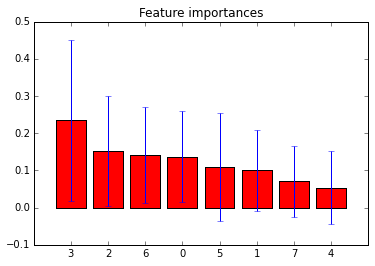

In [24]:
importances, meanaccuracy = doforest(longx[:,:-4], longy[:,2], longfeat[:-4], "longLANGUAGE_forest")

In [25]:
name = "longOPTIC"
deficit = 3
print longylabel[deficit]
dotree(longx, longy[:,deficit],longfeat, name)
print sum(longy[:,deficit])
#IFrame(name+'.pdf',width=700,height=500)

long_vision_def
2.0


In [26]:
#importances, meanaccuracy = doforest(longx, longy[:,3], longfeat, "longOPTIC_forest")